In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
import tensorflow as tf

In [4]:
print(x_train.shape) #형태확인
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
from keras.utils import to_categorical #클래스 벡터(정수들)를 바이너리 클래스 매트릭스로 변환한다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [6]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Conv2D(64, (3,3), padding = 'same', activation ='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(64, (3,3), padding = 'same', activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(128, (3,3), padding = 'same', activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation ='relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

W0906 17:25:31.886274  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 17:25:31.913283  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 17:25:31.918904  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 17:25:32.022677  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
__________

In [8]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['acc']) # For a multi-class classification problem


W0906 17:25:33.817650  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 17:25:33.848009  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
history = model.fit(x_train, y_train, epochs = 1, batch_size = 64, validation_split = 0.2) 

W0906 17:25:35.079517  9264 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0906 17:25:35.502923  9264 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 1722s 43ms/step - loss: 14.4801 - acc: 0.1004 - val_loss: 14.5385 - val_acc: 0.0980


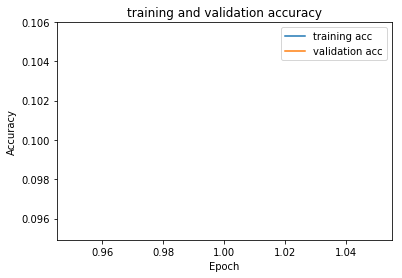

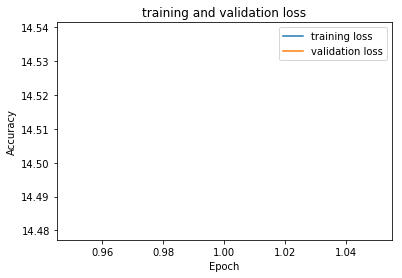

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label = 'training acc')
plt.plot(epochs, acc, label = 'validation acc')
plt.title('training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()